# Feature Engineering

Based on the conclusions formed during exploratory data analysis, we have a better idea of the dataset we are dealing with. We can further clean and refine the data.

In [1]:
# import all libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# matplotlib font
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [2]:
# load the original data
data = pd.read_csv('data/dataset_original.csv')

In [3]:
# sneak peak into the original data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We can drop the id column since it has no affect on the target variable

In [4]:
# dropping the id column
data.drop('id', axis=1, inplace=True)

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


We have 10 independant features and 1 dependant feature --> **Stroke**

## Missing values

Our dataset might have some NaN or missing values

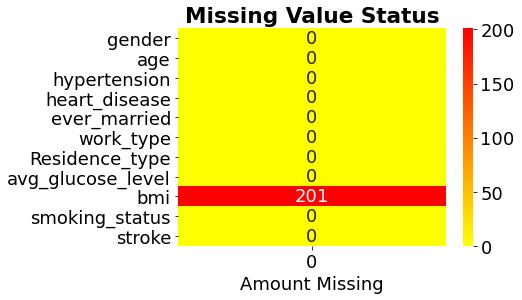

In [7]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='autumn_r')
ax.set_xlabel('Amount Missing')
plt.show()

We can see we have 201 entries for bmi which are NaN

### Dropping the Missing Data

We can deal with the missing data with:
- replace values with mean
- replace values with mode
- replace values with K-nearest neighbour imputer
- drop values

In [ ]:
data = data.dropna()

In [ ]:
data.info()

In [ ]:
# Check for missing values again
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='autumn_r')
ax.set_xlabel('Amount Missing')

# plt.savefig('missing_values_in_all_featuress_after_dropping.png', dpi=300, bbox_inches='tight')
plt.show()

As we can see our data contains no missing values

## Encoding
- https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd  
We have some catagorical features:
- gender
- ever_married
- work_type
- Residence_type
- smoking_status  
We need to encode them since our data only takes in numbers and not classes.

We can use 2 types of encoding to do that:
- Label encoding -> when our categorical feature has 2 categories (0 and 1)
    - ever_married
    - Residence_type
- One-Hot encoding -> when our categorical feature has more than 2 categories
    - gender
    - work_type
    - smoking_status
    
**(In thesis, can write about these)**

### Label Encoding on 'ever_married' and 'Residence_type'

In [ ]:
# Show before encoding
data[['ever_married', 'Residence_type']].head(3)

In [ ]:
# converting 'ever_married' categorical feature to numerical feature
# replace Yes with 1 and No with 0
data['ever_married'] = data['ever_married'].replace({'Yes':1, 'No':0}).astype(int)

# converting 'Residence_type' categorical feature to numerical feature
# replace Urban with 1 and Rural with 0
data['Residence_type'] = data['Residence_type'].replace({'Urban':1, 'Rural':0})

# show new data
data[['ever_married', 'Residence_type']].head(3)

### One-Hot Encoding on 'gender', 'work_type' and 'smoking_status'
Using dummies values approach

In [ ]:
# Show these features before encoding
data['gender'].head(3)

In [ ]:
# gender
data['gender'] = pd.Categorical(data['gender'])
data_gender = pd.get_dummies(data['gender'], prefix = 'gender_')

In [ ]:
# work_type
data['work_type'] = pd.Categorical(data['work_type'])
data_work_type = pd.get_dummies(data['work_type'], prefix = 'work_type_')

In [ ]:
# smoking_status
data['smoking_status'] = pd.Categorical(data['smoking_status'])
data_smoking_status = pd.get_dummies(data['smoking_status'], prefix = 'smoking_status_')

Now that we have 3 new dataframes, we can remove the original 3 columns (gender, work_type, smoking_status) from our data dataframe and replace them with these 3 dataframes

In [ ]:
# remove gender, work_type, smoking_status columns from data
data.drop("gender", axis=1, inplace=True)
data.drop("work_type", axis=1, inplace=True)
data.drop("smoking_status", axis=1, inplace=True)

# show data
data.head()

In [ ]:
# add the new dataframes to this data
data = pd.concat([data, data_gender], axis=1)
data = pd.concat([data, data_work_type], axis=1)
data = pd.concat([data, data_smoking_status], axis=1)

In [ ]:
# Show the categorical features after encoding
data[['gender__Female', 'gender__Male', 'gender__Other']].head(3)

In [ ]:
# show data (this contains no categorical features)
data

In [ ]:
data.info()

As we can see this dataset now doesnt contain any categorical features. This also doesnt contain any missing values and all outlier data points have been removed.

## SMOTE

Our data is highly imbalanced, to counter this we can use SMOTE which is Synthetic Minority Oversampling Technique. (write about smote in thesis)

In [ ]:
count = 0
for target in data['stroke']:
    if target == 1:
        count = count + 1

total_entries = data.shape[0]
total_entries_with_positive_stroke = count
percentage = round((total_entries_with_positive_stroke/total_entries)*100,2)

print(f'Total training data --> {total_entries}')
print(f'Data where Stroke is 1 --> {total_entries_with_positive_stroke}')
print(f'Class where Stroke is 1 is {percentage}% which means our data is highly imbalanced.')

In [ ]:
# Isolate the target feature in y and test into x
x = data.drop('stroke', 1)
y = data['stroke']

In [ ]:
# using SMOTE to synthesize new data points
sm = SMOTE(random_state=2)
x_smote, y_smote = sm.fit_resample(x, y.ravel())

In [ ]:
count = 0
for target in y_smote:
    if target == 1:
        count = count + 1

total_entries = y_smote.shape[0]
total_entries_with_positive_stroke = count
percentage = round((total_entries_with_positive_stroke/total_entries)*100,2)

print(f'Total training data --> {total_entries}')
print(f'Data where Stroke is 1 --> {total_entries_with_positive_stroke}')
print(f'Class where Stroke is 1 is {percentage}% which means our data is now balanced.')

## Train-Test Split

Our data is ready to be divided into training data and testing data. We will also isolate the target feature since this is a supervised classification problem.

We have to divide our data into 2 categories
- Train set -> The largest chunk of our data. We will use this to actually train the model
- Test set -> The final models will be tested on this set to draw final accuracy numbers

In [ ]:
print(x_smote.shape)
print(y_smote.shape)

In [ ]:
# Splitting into train and test sets
# we willl use scikit learns train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size= 0.2, random_state= 96)

In [ ]:
print(f'Total data shape --> {x_smote.shape}')
print(f'x_train shape --> {x_train.shape}')
print(f'x_test shape --> {x_test.shape}')

In [ ]:
# convert y into pandas series for pickling
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# reset index of x
x_train = x_train.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)

### Training Dataset

In [ ]:
total = y_train.count()
count = 0
for value in y_train:
    if value == 1:
        count = count + 1
total_instances_with_stroke = count
total_instances_without_stroke = total - count

print(f'Total instances --> {total}, percentage of total = {total/total*100}')
print(f'Instances with Stroke = 1 --> {total_instances_with_stroke}, percentage of total = {round(total_instances_with_stroke/total*100, 2)}%')
print(f'Instances with Stroke = 0 --> {total_instances_without_stroke}, percentage of total = {round(total_instances_without_stroke/total*100, 2)}%')

### Testing Dataset

In [ ]:
total = y_test.count()
count = 0
for value in y_test:
    if value == 1:
        count = count + 1
total_instances_with_stroke = count
total_instances_without_stroke = total - count

print(f'Total instances --> {total}, percentage of total = {total/total*100}')
print(f'Instances with Stroke = 1 --> {total_instances_with_stroke}, percentage of total = {round(total_instances_with_stroke/total*100, 2)}%')
print(f'Instances with Stroke = 0 --> {total_instances_without_stroke}, percentage of total = {round(total_instances_without_stroke/total*100, 2)}%')

## Serializing the Data

We will now serialize the data and store it in pickle format for easy input to the various Machine Learning algorithms we will be proceeding with.

In [ ]:
x_train.to_pickle('data/x_train.pkl')
y_train.to_pickle('data/y_train.pkl')

x_test.to_pickle('data/x_test.pkl')
y_test.to_pickle('data/y_test.pkl')

## Final Dataset

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test